# Decision Tree Regressor:

- Clean the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
geopolymer_df = pd.read_csv("Artificial Intelligence-Based Life Cycle Assessment for Sustainable Geopolymer Concrete - Copy.csv")
geopolymer_df

,Composition,Ground Granulated Blast-Furnace Slag,Sugarcane Bagasse Ash,Banana Peel Ash,sodium silicate,sodium sulphate,IST(min),FST(min),Comprehensive Strength,Unnamed: 9,Unnamed: 10,Unnamed: 11,FS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 days (psi),7 days (psi),28 days (psi),170 degrees for 24 hours (psi),NaN
1,1.0,66.0,19.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,68.0,17.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,70.0,15.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,72.0,13.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,56.0,59.0,13.0,13.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,57.0,58.0,13.5,13.5,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,58.0,57.0,14.0,14.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,59.0,56.0,14.5,14.5,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
geopolymer_df = geopolymer_df.rename(columns={'Unnamed: 9': 'Comprehensive Strength 7 days(psi)', 'Unnamed: 10': 'Comprehensive Strength 28 days(psi)', 'Unnamed: 11': '170 degrees for 24 hours(psi)'})
geopolymer_df

,Composition,Ground Granulated Blast-Furnace Slag,Sugarcane Bagasse Ash,Banana Peel Ash,sodium silicate,sodium sulphate,IST(min),FST(min),Comprehensive Strength,Comprehensive Strength 7 days(psi),Comprehensive Strength 28 days(psi),170 degrees for 24 hours(psi),FS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 days (psi),7 days (psi),28 days (psi),170 degrees for 24 hours (psi),NaN
1,1.0,66.0,19.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,68.0,17.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,70.0,15.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,72.0,13.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,56.0,59.0,13.0,13.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,57.0,58.0,13.5,13.5,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,58.0,57.0,14.0,14.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,59.0,56.0,14.5,14.5,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
geopolymer_df.drop(geopolymer_df.index[0], inplace=True) 
geopolymer_df

,Composition,Ground Granulated Blast-Furnace Slag,Sugarcane Bagasse Ash,Banana Peel Ash,sodium silicate,sodium sulphate,IST(min),FST(min),Comprehensive Strength,Comprehensive Strength 7 days(psi),Comprehensive Strength 28 days(psi),170 degrees for 24 hours(psi),FS
1,1.0,66.0,19.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,68.0,17.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,70.0,15.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,72.0,13.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,74.0,11.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6.0,76.0,9.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7.0,78.0,7.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8.0,80.0,5.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9.0,82.0,3.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,10.0,84.0,1.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
geopolymer_df.head()

,Composition,Ground Granulated Blast-Furnace Slag,Sugarcane Bagasse Ash,Banana Peel Ash,sodium silicate,sodium sulphate,IST(min),FST(min),Comprehensive Strength,Comprehensive Strength 7 days(psi),Comprehensive Strength 28 days(psi),170 degrees for 24 hours(psi),FS
1,1.0,66.0,19.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,68.0,17.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,70.0,15.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,72.0,13.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,74.0,11.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Input Values

In [6]:
geopolymer_df.head()

,Composition,Ground Granulated Blast-Furnace Slag,Sugarcane Bagasse Ash,Banana Peel Ash,sodium silicate,sodium sulphate,IST(min),FST(min),Comprehensive Strength,Comprehensive Strength 7 days(psi),Comprehensive Strength 28 days(psi),170 degrees for 24 hours(psi),FS
1,1.0,66.0,19.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,68.0,17.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,70.0,15.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,72.0,13.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,74.0,11.0,0.0,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
mask_ist = geopolymer_df['IST(min)'].isna()
geopolymer_df.loc[mask_ist, 'IST(min)'] = np.random.uniform(low=30, high=80, size=mask_ist.sum())
geopolymer_df['IST(min)'] = geopolymer_df['IST(min)'].astype(int)

mask_fst = geopolymer_df['FST(min)'].isna()
geopolymer_df.loc[mask_fst, 'FST(min)'] = np.random.uniform(low=30, high=80, size=mask_fst.sum())
geopolymer_df['FST(min)'] = geopolymer_df['FST(min)'].astype(int)

mask_low_cs = geopolymer_df['Comprehensive Strength'].isna()
geopolymer_df.loc[mask_low_cs, 'Comprehensive Strength'] = np.random.uniform(low=10, high=20, size=mask_low_cs.sum())
geopolymer_df['Comprehensive Strength'] = geopolymer_df['Comprehensive Strength'].astype(int)

mask_medium_cs = geopolymer_df['Comprehensive Strength 7 days(psi)'].isna()
geopolymer_df.loc[mask_medium_cs, 'Comprehensive Strength 7 days(psi)'] = np.random.uniform(low=15, high=35, size=mask_medium_cs.sum())
geopolymer_df['Comprehensive Strength 7 days(psi)'] = geopolymer_df['Comprehensive Strength 7 days(psi)'].astype(int)

mask_high_cs = geopolymer_df['Comprehensive Strength 28 days(psi)'].isna()
geopolymer_df.loc[mask_high_cs, 'Comprehensive Strength 28 days(psi)'] = np.random.uniform(low=45, high=80, size=mask_high_cs.sum())
geopolymer_df['Comprehensive Strength 28 days(psi)'] = geopolymer_df['Comprehensive Strength 28 days(psi)'].astype(int)

mask_170_degrees = geopolymer_df['170 degrees for 24 hours(psi)'].isna()
geopolymer_df.loc[mask_170_degrees, '170 degrees for 24 hours(psi)'] = np.random.uniform(low=25, high=40, size=mask_170_degrees.sum())
geopolymer_df['170 degrees for 24 hours(psi)'] = geopolymer_df['170 degrees for 24 hours(psi)'].astype(int)

mask_fs = geopolymer_df['FS'].isna()
geopolymer_df.loc[mask_fs, 'FS'] = np.random.uniform(low=15, high=35, size=mask_fs.sum())
geopolymer_df['FS'] = geopolymer_df['FS'].astype(int)

geopolymer_df.head()

C:\Users\sydne\AppData\Local\Temp\ipykernel_22692\3616810849.py:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  geopolymer_df.loc[mask_low_cs, 'Comprehensive Strength'] = np.random.uniform(low=10, high=20, size=mask_low_cs.sum())
C:\Users\sydne\AppData\Local\Temp\ipykernel_22692\3616810849.py:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  geopolymer_df.loc[mask_medium_cs, 'Comprehensive Strength 7 days(psi)'] = np.random.uniform(low=15, high=35, size=mask_medium_cs.sum())
C:\Users\sydne\AppData\Local\Temp\ipykernel_22692\3616810849.py:

,Composition,Ground Granulated Blast-Furnace Slag,Sugarcane Bagasse Ash,Banana Peel Ash,sodium silicate,sodium sulphate,IST(min),FST(min),Comprehensive Strength,Comprehensive Strength 7 days(psi),Comprehensive Strength 28 days(psi),170 degrees for 24 hours(psi),FS
1,1.0,66.0,19.0,0.0,7.5,7.5,77,49,16,23,69,29,23
2,2.0,68.0,17.0,0.0,7.5,7.5,71,63,11,25,67,33,21
3,3.0,70.0,15.0,0.0,7.5,7.5,62,74,10,31,49,35,23
4,4.0,72.0,13.0,0.0,7.5,7.5,76,65,11,31,67,36,25
5,5.0,74.0,11.0,0.0,7.5,7.5,57,74,13,24,46,31,30


In [8]:
# summary of statistics
geopolymer_df.describe()

,Composition,Ground Granulated Blast-Furnace Slag,Sugarcane Bagasse Ash,Banana Peel Ash,sodium silicate,sodium sulphate,IST(min),FST(min),Comprehensive Strength,Comprehensive Strength 7 days(psi),Comprehensive Strength 28 days(psi),170 degrees for 24 hours(psi),FS
count,60.000000,60.000000,60.000000,60.000000,60.0,60.0,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,30.500000,67.250000,8.875000,8.875000,7.5,7.5,58.233333,55.716667,14.416667,25.383333,61.683333,31.933333,23.683333
std,17.464249,9.058426,9.358955,9.358955,0.0,0.0,15.321821,13.396296,2.935993,5.288592,8.693445,4.293735,6.590933
min,1.000000,55.000000,0.000000,0.000000,7.5,7.5,31.000000,32.000000,10.000000,15.000000,46.000000,25.000000,15.000000
25%,15.750000,59.750000,0.000000,0.000000,7.5,7.5,46.750000,44.750000,12.000000,21.000000,55.750000,28.000000,17.000000
50%,30.500000,65.000000,6.750000,6.750000,7.5,7.5,61.500000,55.000000,14.000000,25.500000,62.500000,32.000000,23.000000
75%,45.250000,74.500000,14.125000,14.125000,7.5,7.5,72.250000,65.250000,17.000000,29.250000,67.000000,35.000000,30.000000
max,60.000000,84.000000,30.000000,30.000000,7.5,7.5,79.000000,77.000000,19.000000,34.000000,79.000000,39.000000,34.000000


# Train and Test the Data:

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [10]:
X = geopolymer_df.iloc[:, 6:8]
y = geopolymer_df.iloc[:, 8:12]
y

,Comprehensive Strength,Comprehensive Strength 7 days(psi),Comprehensive Strength 28 days(psi),170 degrees for 24 hours(psi)
1,16,23,69,29
2,11,25,67,33
3,10,31,49,35
4,11,31,67,36
5,13,24,46,31
6,13,20,59,37
7,11,28,67,29
8,18,29,46,37
9,17,16,61,29
10,14,32,60,34


In [11]:
from sklearn.model_selection import GridSearchCV

# function for best parameters:
def best_params(X, y):
    param_grid = {
    'max_depth': [3,5,7,10,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
    }

    grid = GridSearchCV(DecisionTreeRegressor(random_state=42),
                    param_grid,
                    cv=5,
                    scoring='r2')

    grid.fit(X, y)

    return grid.best_params_

best_params(X,y)

{'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10}

In [15]:
from sklearn.model_selection import GridSearchCV
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create model
#dtr = DecisionTreeRegressor(max_depth=2, min_samples_leaf=2, min_samples_split=20, random_state=42)

# grid = GridSearchCV(DecisionTreeRegressor(random_state=42),
#                     param_grid,
#                     cv=5,
#                     scoring='r2')

# param_grid = {
#     'max_depth': [3,5,7,10,None],
#     'min_samples_split': [2,5,10],
#     'min_samples_leaf': [1,2,4]
# }

# grid.fit(X_train, y_train)

dtr = DecisionTreeRegressor(**best_params(X,y), random_state=42)

# train
dtr.fit(X_train, y_train)

# predict 
y_pred = dtr.predict(X_test)

# R2 score
print("R2 Score (overall):", r2_score(y_test, y_pred))

# print("Train R2:", dtr.score(X_train, y_train))
# print("Test R2:", dtr.score(X_test, y_test))

# mean square error
print("MSE: ", mean_squared_error(y_test, y_pred))

R2 Score (overall): -0.10638220899241724
MSE:  28.726215793500764


- MSE = 0 → perfect model

- R² = 1 → perfect model

- R² = 0 → model is useless (same as predicting mean)

- R² < 0 → model is worse than predicting mean

# Outputs Performance:

In [16]:
# function outputs performance for output values:
def outputs_performance(y, y_test, y_pred):
    for i, col in enumerate(y.columns):
        print(col)
        print("MSE:", mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
        print("R2:", r2_score(y_test.iloc[:, i], y_pred[:, i]))
        print()

print(outputs_performance(y, y_test, y_pred))

Comprehensive Strength
MSE: 7.019012898164937
R2: -0.05725717294534616

Comprehensive Strength 7 days(psi)
MSE: 34.65953361495827
R2: -0.2929981452212411

Comprehensive Strength 28 days(psi)
MSE: 51.3127266502064
R2: -0.13835042946074871

170 degrees for 24 hours(psi)
MSE: 21.91359001067345
R2: 0.06307691165766705

None


# Visualize Decision Tree:

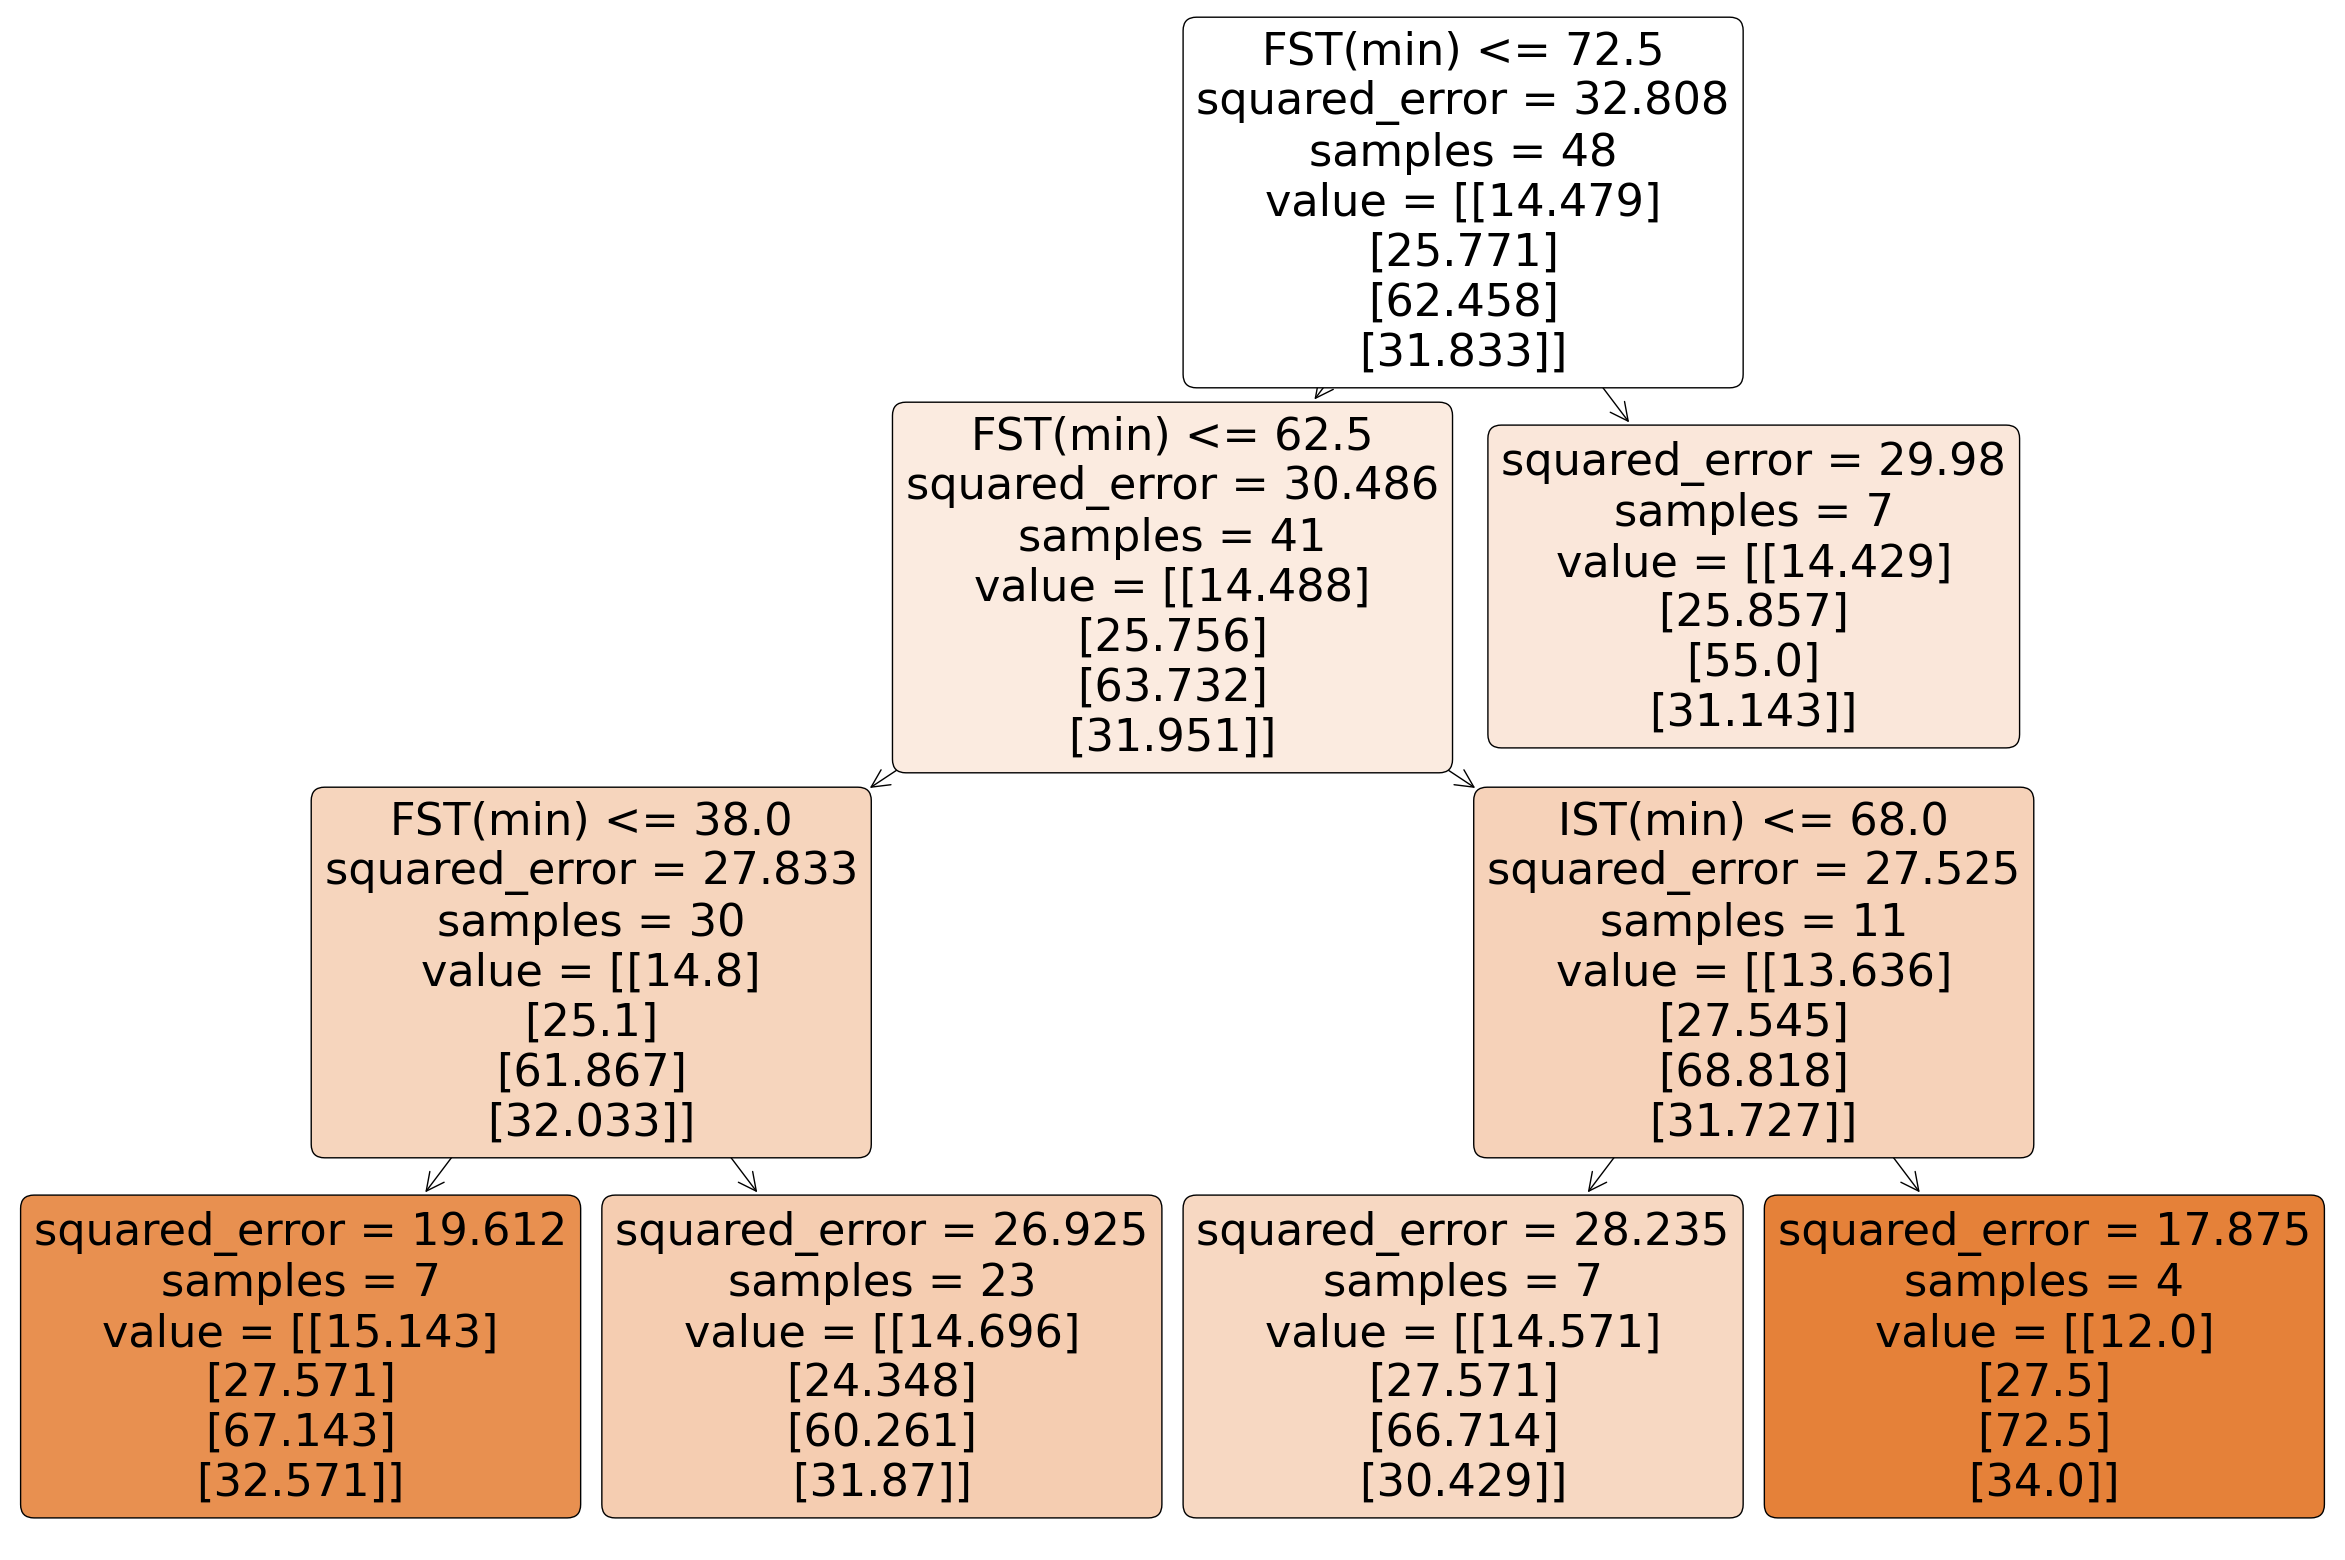

In [17]:
from sklearn.tree import plot_tree
# flow chart dtr:
def dtr_flow_inputs(dtr, X):
    """dtr flow chart of inputs."""
    plt.figure(figsize=(30, 20))
    plot_tree(dtr, feature_names=X.columns, filled=True, rounded=True)
    return plt.show()

dtr_flow_inputs(dtr, X)

 - Features that appear higher up the tree (root), create the most significant reduction in error (variance reduction).
 - Tree depth: Shallow trees are easire to understand, while deep trees are more complex.
 - Evaluate the decision rule: Baggasse Ash <= 10.25
 - Node info: feature < or >, mean squared error, number of samples, and predicted values.
 - Final Prediction: is the representative average. 
 - A regression decision tree predicts four outcomes using FST and IST (minutes). The root split is FST ≤ 68.5. Lower FST and IST values generally associate with slightly lower predicted values, while higher times increase them. Leaf nodes show mean predictions, sample sizes, and squared error, indicating model fit per segment.

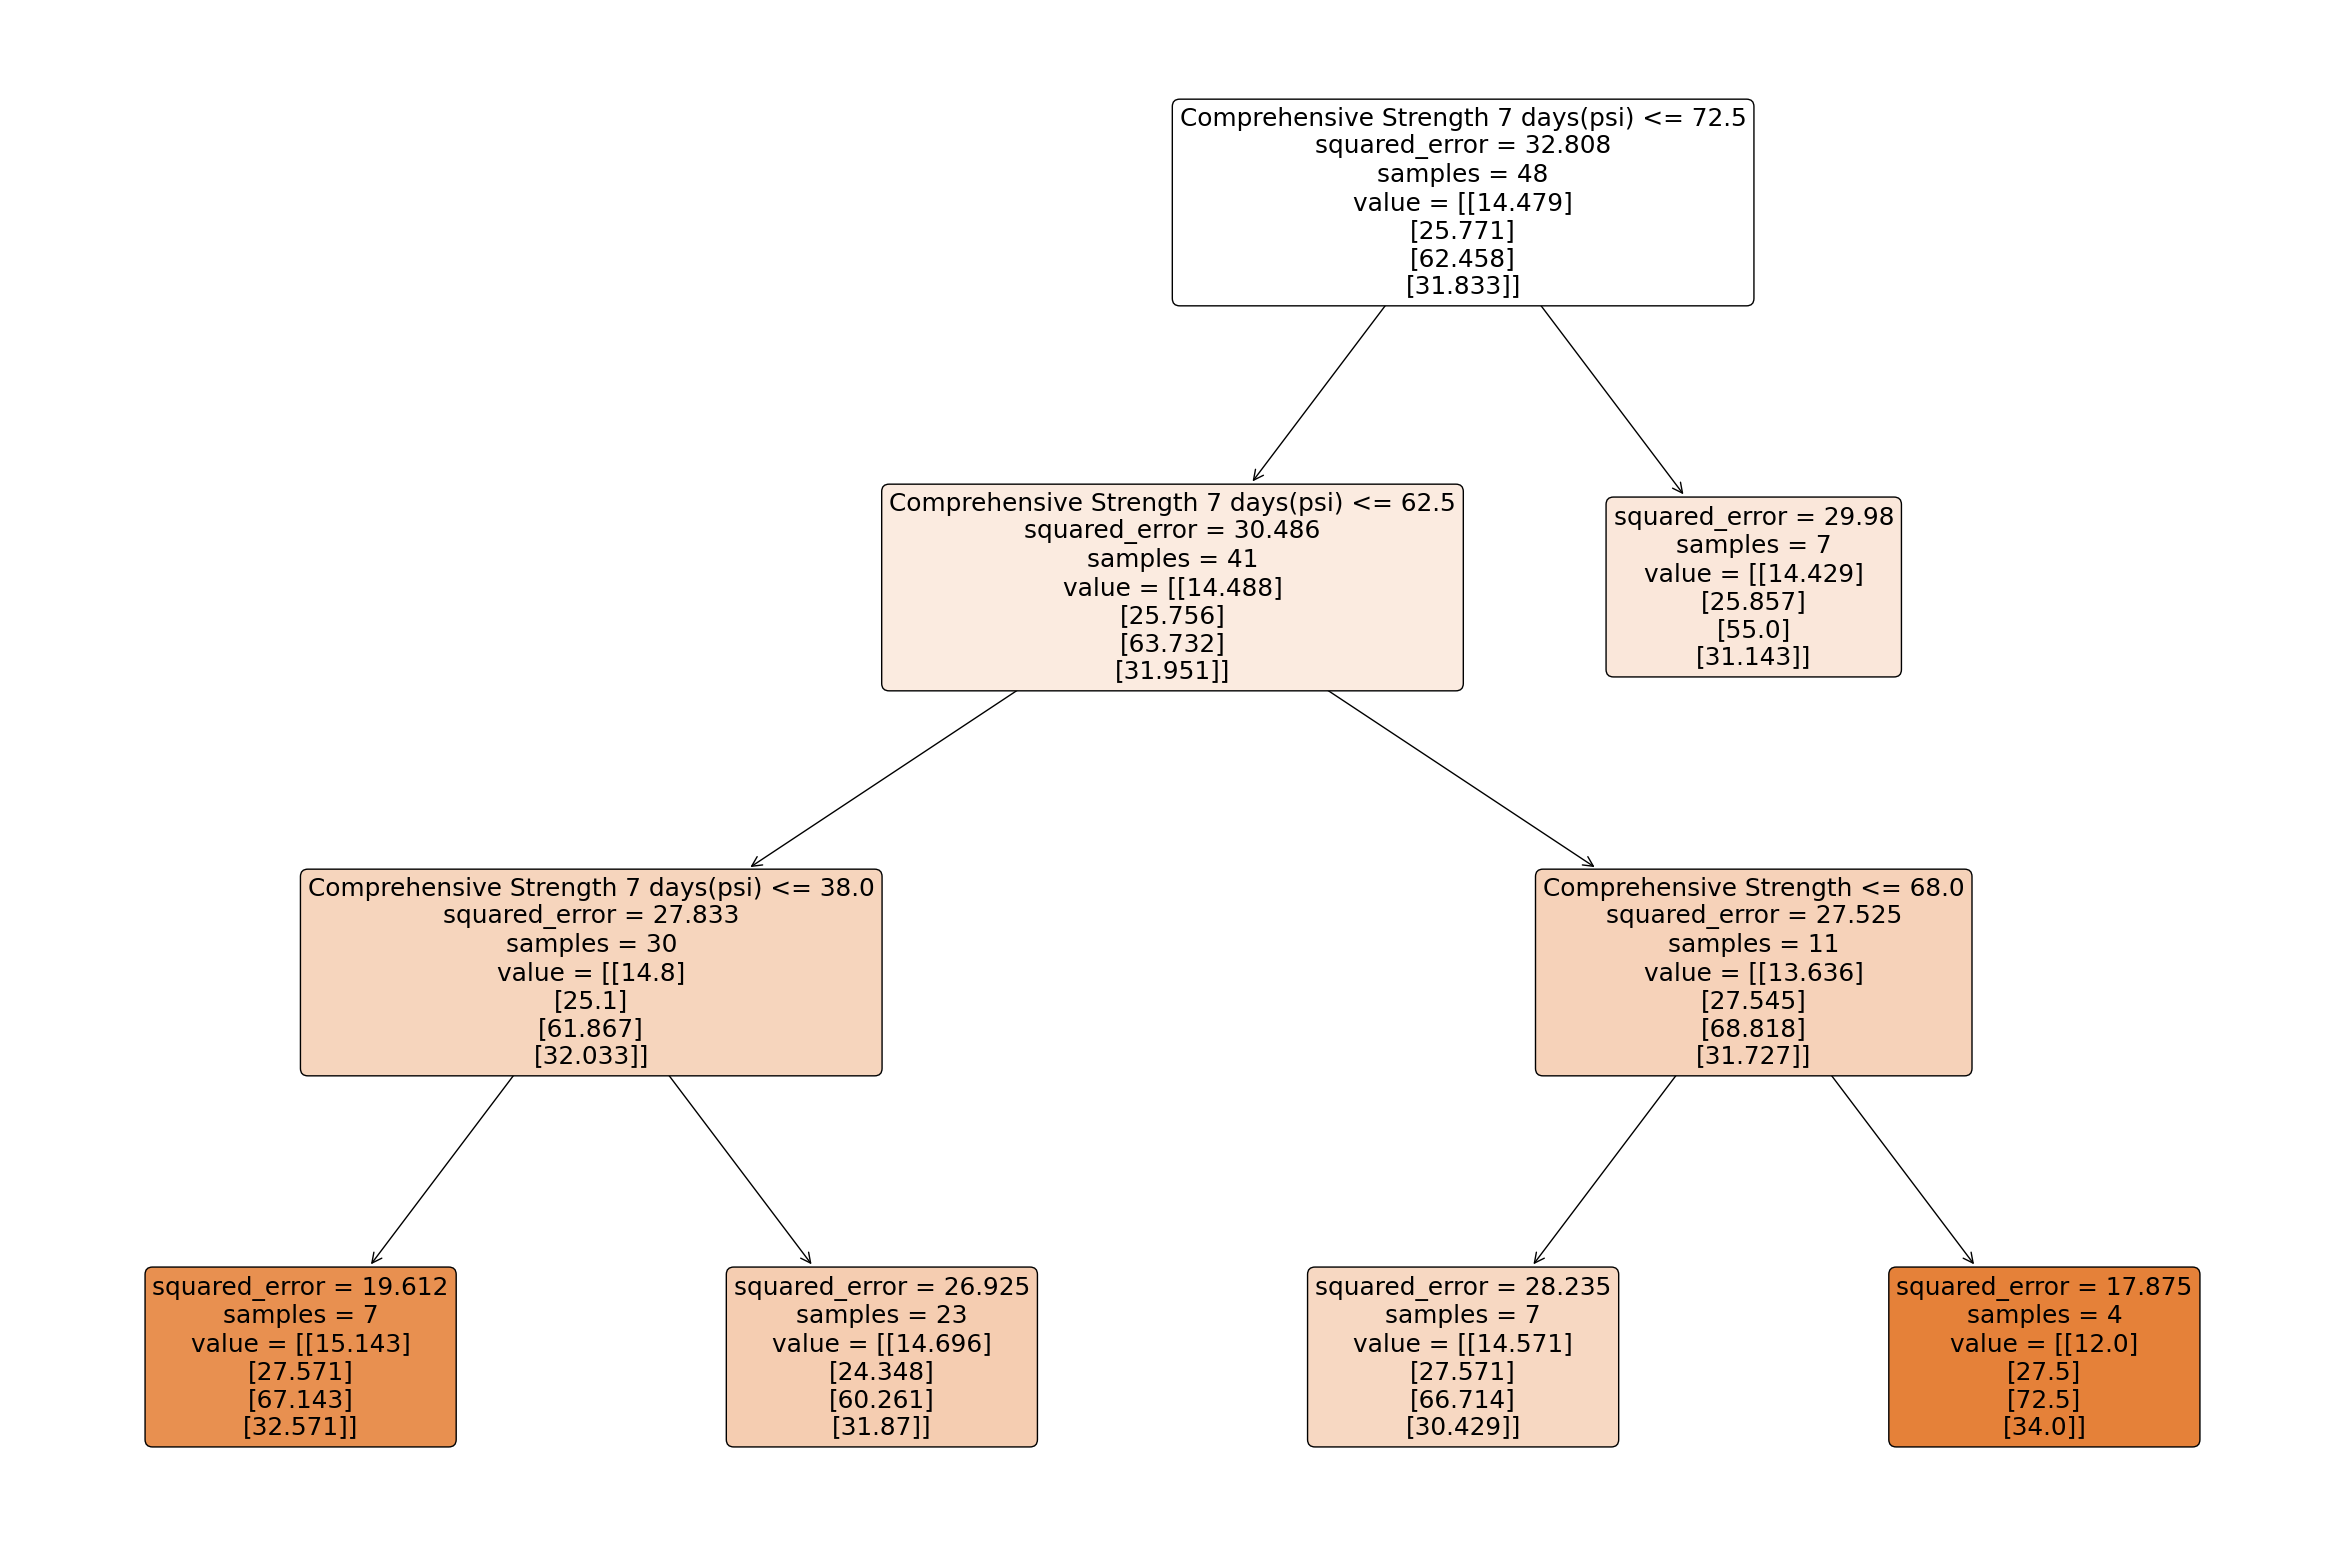

In [18]:
# DTR function of outputs:
def dtr_flow_outputs(dtr, y):
    """dtr flow chart of the outputs."""
    plt.figure(figsize=(30, 20))
    plot_tree(dtr, feature_names=y.columns, filled=True, rounded=True)
    return plt.show()

dtr_flow_outputs(dtr, y)

- A regression tree predicts outcomes using 7-day and overall compressive strength (psi). The root split is at 68.5 psi. Lower strengths generally yield lower predicted values; higher strengths increase them. Leaf nodes display mean predictions, sample counts, and squared error, indicating prediction accuracy within each strength range.

# Improve Model:

In [19]:
from sklearn.model_selection import cross_val_score

# get the cross_val score
def cross_validation_score(dtr, X, y):
    scores = cross_val_score(dtr, X, y, cv=5)
    return print("Mean Cross-Validation Score: ", scores.mean())

cross_validation_score(dtr, X, y)

Mean Cross-Validation Score:  -0.25394988961437304


 - Good Fit --> High --> close to training value, performing well and effectively
 - Overfitting --> High --> Significantly lower, learned training data to well, too much noise, struggles with unseen data.
 - Underfitting --> Low --> Low close to training score, model is too simple.

# Interpretation:

In [20]:
# get feature importance

def feature_importance_x(dtr, X):
    """Return feature importance for inputs."""
    importance_x = pd.Series(dtr.feature_importances_, index=X.columns).sort_values(ascending=False)
    return print(importance_x)

feature_importance_x(dtr, X)

FST(min)    0.900853
IST(min)    0.099147
dtype: float64


- Measures the impact on each feature values importance on prediction.

In [21]:
# Decision Tree Regression
# plt.figure()
# plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
# plt.plot(X_test, y_pred, color="cornflowerblue", label="max_depth=2", linewidth=2)
# plt.plot(X_test, y_pred, color="yellowgreen", label="max_depth=5", linewidth=2)
# plt.xlabel("data")
# plt.ylabel("target")
# plt.title("Decision Tree Regression")
# plt.legend()
# plt.show()

- Decision Tree Regressor is weak model to train/test and predict values.

# Low Comprehensive Strength vs IST Plot:

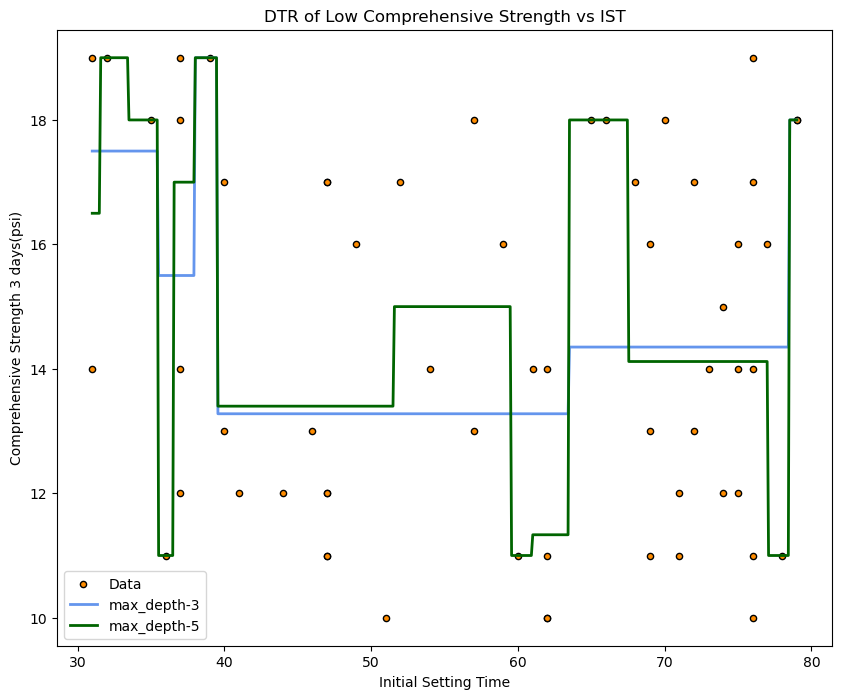

In [28]:
# dtr of low comprehensive strength vs IST:
def dtr_low_CS_IST(df):
    """Return decision tree regressor of low cs vs IST."""
    X_IST = df.iloc[:, 6].values.reshape(-1, 1)
    y_CS3 = df.iloc[:, 8].values

    X_train, X_test, y_train, y_test = train_test_split(X_IST, y_CS3, test_size=0.2, random_state=42)
    
    regr_0 = DecisionTreeRegressor(max_depth=3, random_state=42)
    regr_0.fit(X_train, y_train)

    regr_1 = DecisionTreeRegressor(max_depth=5, random_state=42)
    regr_1.fit(X_train, y_train)
    
    X_range = np.linspace(X_IST.min(), X_IST.max(), 500).reshape(-1, 1)

    y_0 = regr_0.predict(X_range)
    y_1 = regr_1.predict(X_range)
    
    plt.figure(figsize=(10, 8))

    plt.scatter(X_IST, y_CS3, s=20, edgecolor="black", c="darkorange", label="Data")

    plt.plot(X_range, y_0, color="cornflowerblue", label="max_depth-3", linewidth=2)
    plt.plot(X_range, y_1, color="darkgreen", label="max_depth-5", linewidth=2)


    plt.xlabel("Initial Setting Time")
    plt.ylabel("Comprehensive Strength 3 days(psi)")
    plt.title("DTR of Low Comprehensive Strength vs IST")
    plt.legend()
    return plt.show()

dtr_low_CS_IST(geopolymer_df)

- Scatterplot of IST (min) vs. 3-day compressive strength (psi) with decision-tree regressions (depth-3 and depth-5). Strength varies nonlinearly with IST. The deeper tree (green) captures more local fluctuations and fits data more closely, while the shallower tree (blue) provides smoother, generalized stepwise predictions.


# Low Comprehensive Strength vs FST Plot:

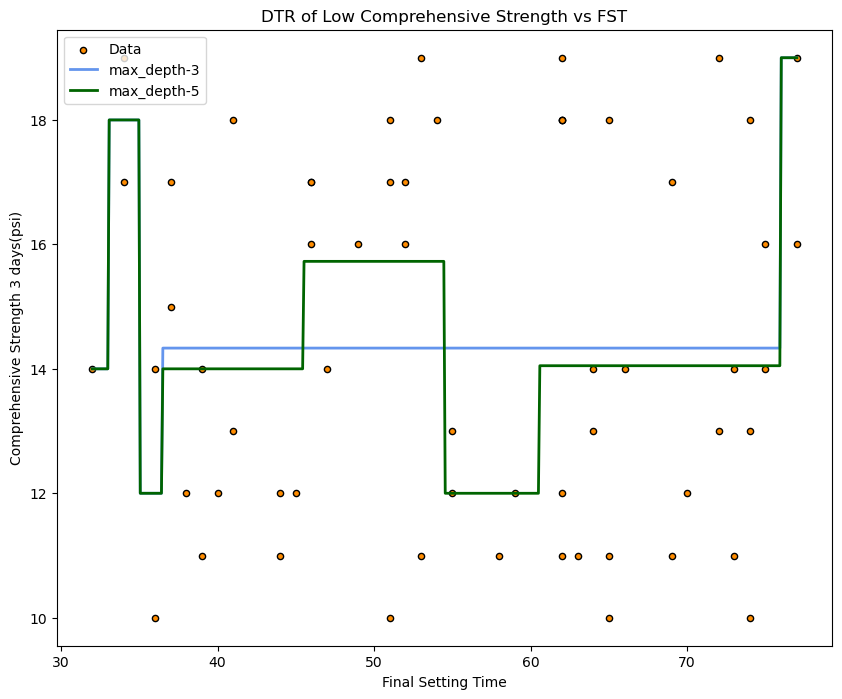

In [29]:
# dtr of low comprehensive strength vs FST:
def dtr_low_CS_FST(df):
    """Return decision tree regressor plot of low cs vs FST."""
    X_FST = df.iloc[:, 7].values.reshape(-1, 1)
    y_CS3 = df.iloc[:, 8].values

    X_train, X_test, y_train,y_test= train_test_split(X_FST, y_CS3, test_size=0.2, random_state=42)
    
    regr_0 = DecisionTreeRegressor(max_depth=3, random_state=42)
    regr_0.fit(X_train, y_train)

    regr_1 = DecisionTreeRegressor(max_depth=5, random_state=42)
    regr_1.fit(X_train, y_train)
    
    X_range = np.linspace(X_FST.min(), X_FST.max(), 500).reshape(-1, 1)

    y_0 = regr_0.predict(X_range)
    y_1 = regr_1.predict(X_range)
    
    plt.figure(figsize=(10, 8))

    plt.scatter(X_FST, y_CS3, s=20, edgecolor="black", c="darkorange", label="Data")

    plt.plot(X_range, y_0, color="cornflowerblue", label="max_depth-3", linewidth=2)
    plt.plot(X_range, y_1, color="darkgreen", label="max_depth-5", linewidth=2)


    plt.xlabel("Final Setting Time")
    plt.ylabel("Comprehensive Strength 3 days(psi)")
    plt.title("DTR of Low Comprehensive Strength vs FST")
    plt.legend()
    return plt.show()

dtr_low_CS_FST(geopolymer_df)
    

- Scatter points show compressive strength over three days. The max_depth-3 model (blue) underfits, predicting nearly constant values around 14 psi. The max_depth-5 model (green) follows data more closely but fluctuates sharply, indicating overfitting. Thus, depth-3 has high bias; depth-5 has high variance.


# Medium Comprehensive Strength vs IST Plot:

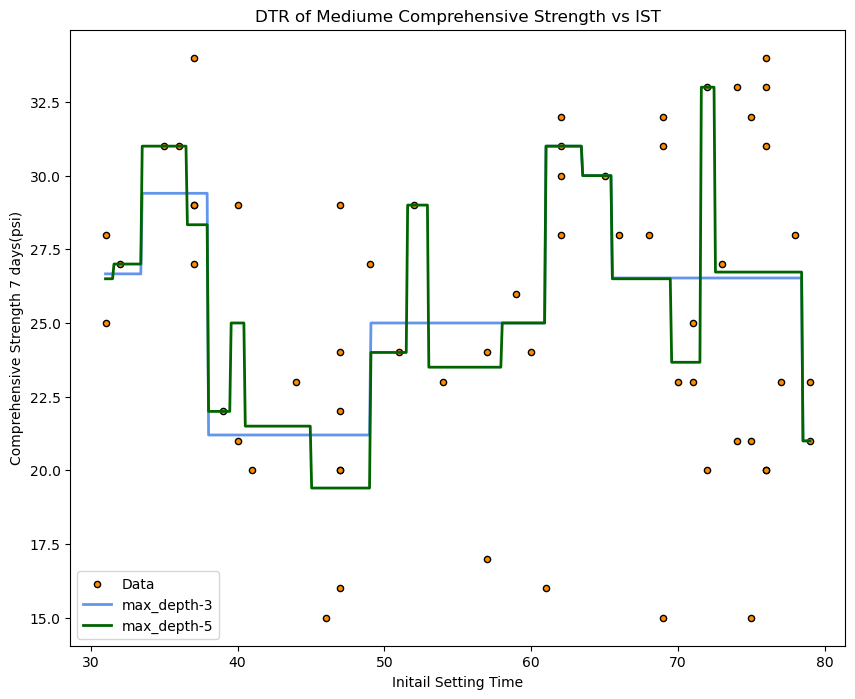

In [31]:
def dtr_medium_CS_IST(df):
    """Return decision tree regressor plot of medium CS vs IST."""
    X_IST = df.iloc[:, 6].values.reshape(-1, 1)
    y_CS7 = df.iloc[:, 9].values

    X_train, X_test, y_train, y_test = train_test_split(X_IST, y_CS7, test_size=0.2, random_state=42)
    
    regr_0 = DecisionTreeRegressor(max_depth=3, random_state=42)
    regr_0.fit(X_train, y_train)

    regr_1 = DecisionTreeRegressor(max_depth=5, random_state=42)
    regr_1.fit(X_train, y_train)
    
    X_range = np.linspace(X_IST.min(), X_IST.max(), 500).reshape(-1, 1)
    
    y_0 = regr_0.predict(X_range)
    y_1 = regr_1.predict(X_range)
    
    plt.figure(figsize=(10, 8))

    plt.scatter(X_IST, y_CS7, s=20, edgecolor="black", c="darkorange", label="Data")

    plt.plot(X_range, y_0, color="cornflowerblue", label="max_depth-3", linewidth=2)
    plt.plot(X_range, y_1, color="darkgreen", label="max_depth-5", linewidth=2)


    plt.xlabel("Initail Setting Time")
    plt.ylabel("Comprehensive Strength 7 days(psi)")
    plt.title("DTR of Mediume Comprehensive Strength vs IST")
    plt.legend()
    return plt.show()

dtr_medium_CS_IST(geopolymer_df)

- No Correlation.
-  Data is dispersed.
- Model is over fitting.
- The scatter shows 7-day compressive strength versus IST. The max_depth-3 model (blue) gives smoother, piecewise-constant predictions, capturing general trends but missing local variation. The max_depth-5 model (green) tracks fluctuations more closely, with sharper jumps, suggesting better fit to training data but increased variance and potential overfitting.


# Medium Comprehensive Strength vs FST Plot:

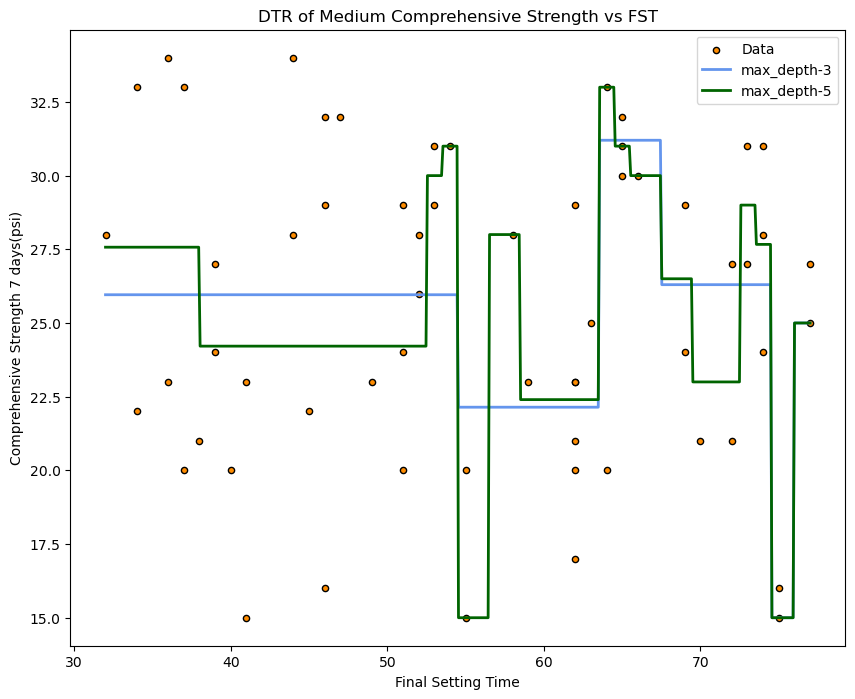

In [33]:
def dtr_medium_CS_FST(df):
    """Returns decision tree regressor of medium cs vs fst."""
    X_FST = df.iloc[:, 7].values.reshape(-1, 1)
    y_CS7 = df.iloc[:, 9].values
    X_train, X_test, y_train, y_test = train_test_split(X_FST, y_CS7, test_size=0.2, random_state=42)
    
    regr_0 = DecisionTreeRegressor(max_depth=3, random_state=42)
    regr_0.fit(X_train, y_train)

    regr_1 = DecisionTreeRegressor(max_depth=5, random_state=42)
    regr_1.fit(X_train, y_train)
    
    X_range = np.linspace(X_FST.min(), X_FST.max(), 500).reshape(-1, 1)
    y_0 = regr_0.predict(X_range)
    y_1 = regr_1.predict(X_range)
    
    plt.figure(figsize=(10, 8))

    plt.scatter(X_FST, y_CS7, s=20, edgecolor="black", c="darkorange", label="Data")

    plt.plot(X_range, y_0, color="cornflowerblue", label="max_depth-3", linewidth=2)
    plt.plot(X_range, y_1, color="darkgreen", label="max_depth-5", linewidth=2)


    plt.xlabel("Final Setting Time")
    plt.ylabel("Comprehensive Strength 7 days(psi)")
    plt.title("DTR of Medium Comprehensive Strength vs FST")
    plt.legend()
    return plt.show()

dtr_medium_CS_FST(geopolymer_df)

- Scatter plot is Dispersed.
- No Correlation.
- overfitting.
- The scatter shows 7-day compressive strength versus FST. The max_depth-3 model (blue) captures the overall trend with broad, stable segments but misses sharp changes. The max_depth-5 model (green) follows local variations closely with abrupt splits, fitting training data better but showing higher variance and likely overfitting.


# High Comprehensive Strength vs IST Plot:

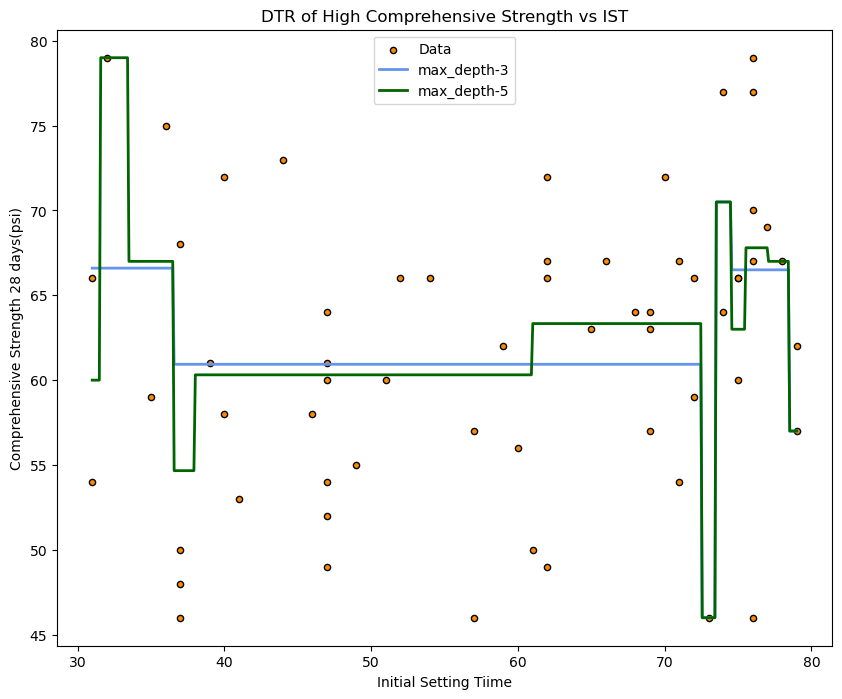

In [38]:
def dtr_high_CS_IST(df):
    """Returns decision tree regressor for high cs vs ist."""
    X_IST = df.iloc[:, 6].values.reshape(-1, 1)
    y_CS28 = df.iloc[:, 10].values
    X_train_IST, X_test_IST, y_train_IST, y_test_IST = train_test_split(X_IST, y_CS28, test_size=0.2, random_state=42)
    
    regr_0 = DecisionTreeRegressor(max_depth=3, random_state=42)
    regr_0.fit(X_train_IST, y_train_IST)

    regr_1 = DecisionTreeRegressor(max_depth=5, random_state=42)
    regr_1.fit(X_train_IST, y_train_IST)
    
    X_range = np.linspace(X_IST.min(), X_IST.max(), 500).reshape(-1, 1)
    y_0 = regr_0.predict(X_range)
    y_1 = regr_1.predict(X_range)
    
    plt.figure(figsize=(10, 8))

    plt.scatter(X_IST, y_CS28, s=20, edgecolor="black", c="darkorange", label="Data")

    plt.plot(X_range, y_0, color="cornflowerblue", label="max_depth-3", linewidth=2)
    plt.plot(X_range, y_1, color="darkgreen", label="max_depth-5", linewidth=2)


    plt.xlabel("Initial Setting Tiime")
    plt.ylabel("Comprehensive Strength 28 days(psi)")
    plt.title("DTR of High Comprehensive Strength vs IST")
    plt.legend()
    return plt.show()

dtr_high_CS_IST(geopolymer_df)

- Data is dispersed.
- No correlation.
- some underfitting.
- some overfitting.
- The scatter shows 28-day compressive strength versus FST. The max_depth-3 model (blue) predicts broad, nearly constant regions, underfitting the variability. The max_depth-5 model (green) adapts to local changes with sharp splits, fitting training data more closely but showing higher variance and potential overfitting compared to the simpler model.


# High Comprehensive Strength vs FST Plot:

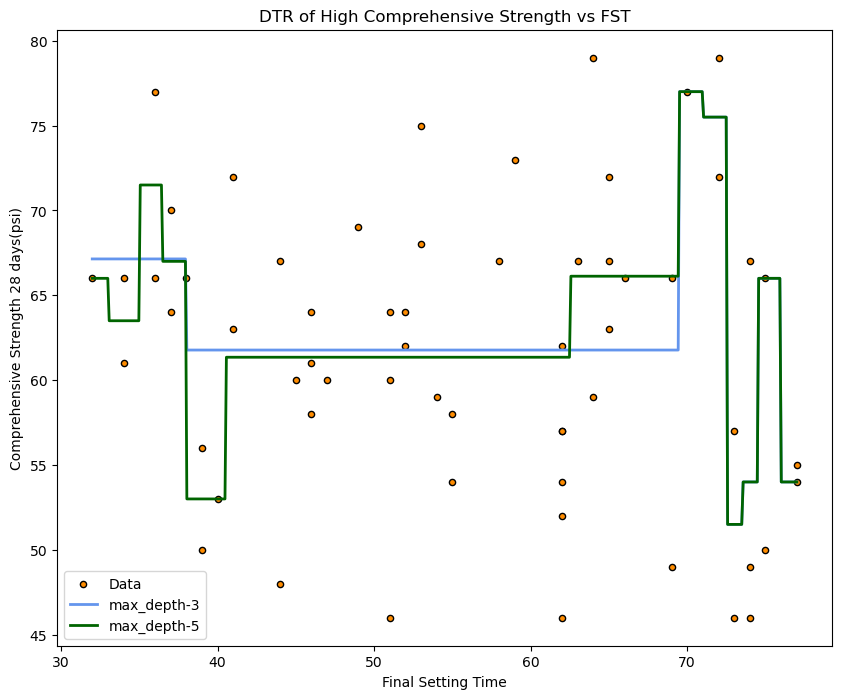

In [39]:
def dtr_high_CS_FST(df):
    """Returns decision tree regressor of high cs vs fst."""
    X_FST = df.iloc[:, 7].values.reshape(-1, 1)
    y_CS28 = df.iloc[:, 10].values
    X_train_FST, X_test_FST, y_train_FST, y_test_FST = train_test_split(X_FST, y_CS28, test_size=0.2, random_state=42)
    
    regr_0 = DecisionTreeRegressor(max_depth=3, random_state=42)
    regr_0.fit(X_train_FST, y_train_FST)

    regr_1 = DecisionTreeRegressor(max_depth=5, random_state=42)
    regr_1.fit(X_train_FST, y_train_FST)
    
    X_range_FST = np.linspace(X_FST.min(), X_FST.max(), 500).reshape(-1, 1)
    y_0 = regr_0.predict(X_range_FST)
    y_1 = regr_1.predict(X_range_FST)
    
    plt.figure(figsize=(10, 8))

    plt.scatter(X_FST, y_CS28, s=20, edgecolor="black", c="darkorange", label="Data")

    plt.plot(X_range_FST, y_0, color="cornflowerblue", label="max_depth-3", linewidth=2)
    plt.plot(X_range_FST, y_1, color="darkgreen", label="max_depth-5", linewidth=2)


    plt.xlabel("Final Setting Time")
    plt.ylabel("Comprehensive Strength 28 days(psi)")
    plt.title("DTR of High Comprehensive Strength vs FST")
    plt.legend()
    return plt.show()

dtr_high_CS_FST(geopolymer_df)

- Data is dispersed.
- No Correlation.
- little underfitting.
- no overfitting.
- The scatter shows 28-day compressive strength versus FST. The max_depth-3 model (blue) captures broad trends with smoother, stepwise regions but misses sharp fluctuations. The max_depth-5 model (green) closely follows local variations with abrupt splits, fitting training data better yet exhibiting higher variance and likely overfitting.


# 170 Degrees for 24 hours(psi) vs IST Plot:

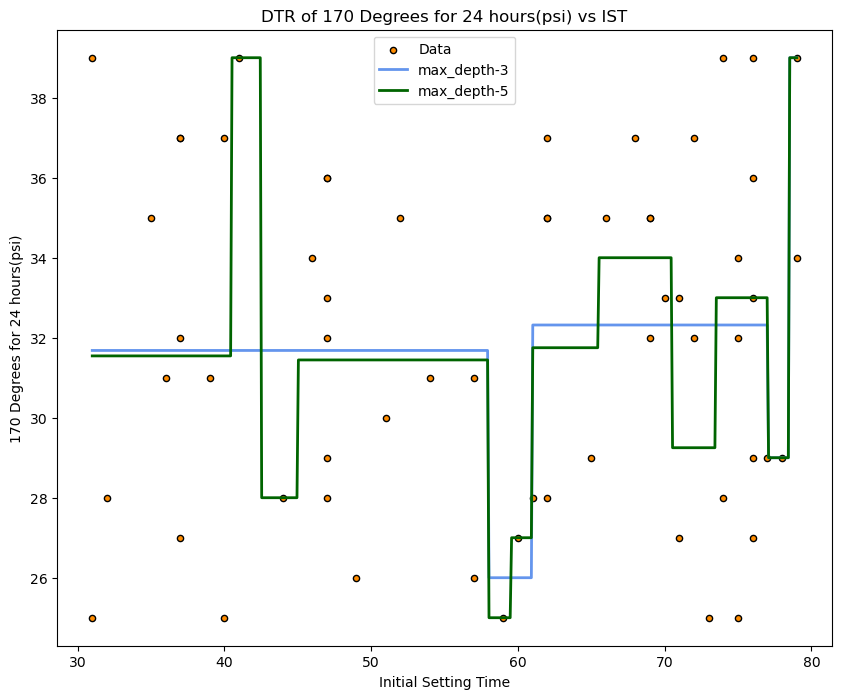

In [40]:
def dtr_170degrees_IST(df):
    """Returns decision tree regressor for 170 degrees for 24(hours) vs IST."""
    X_IST = df.iloc[:, 6].values.reshape(-1, 1)
    y_170 = df.iloc[:, 11].values
    X_train, X_test, y_train, y_test = train_test_split(X_IST, y_170, test_size=0.2, random_state=42)
    
    regr_0 = DecisionTreeRegressor(max_depth=3, random_state=42)
    regr_0.fit(X_train, y_train)

    regr_1 = DecisionTreeRegressor(max_depth=5, random_state=42)
    regr_1.fit(X_train, y_train)
    
    X_range = np.linspace(X_IST.min(), X_IST.max(), 500).reshape(-1, 1)
    y_0 = regr_0.predict(X_range)
    y_1 = regr_1.predict(X_range)
    
    plt.figure(figsize=(10, 8))

    plt.scatter(X_IST, y_170, s=20, edgecolor="black", c="darkorange", label="Data")

    plt.plot(X_range, y_0, color="cornflowerblue", label="max_depth-3", linewidth=2)
    plt.plot(X_range, y_1, color="darkgreen", label="max_depth-5", linewidth=2)


    plt.xlabel("Initial Setting Time")
    plt.ylabel("170 Degrees for 24 hours(psi)")
    plt.title("DTR of 170 Degrees for 24 hours(psi) vs IST")
    plt.legend()
    return plt.show()

dtr_170degrees_IST(geopolymer_df)

# 170 Degrees for 24 hours(psi) vs FST Plot:

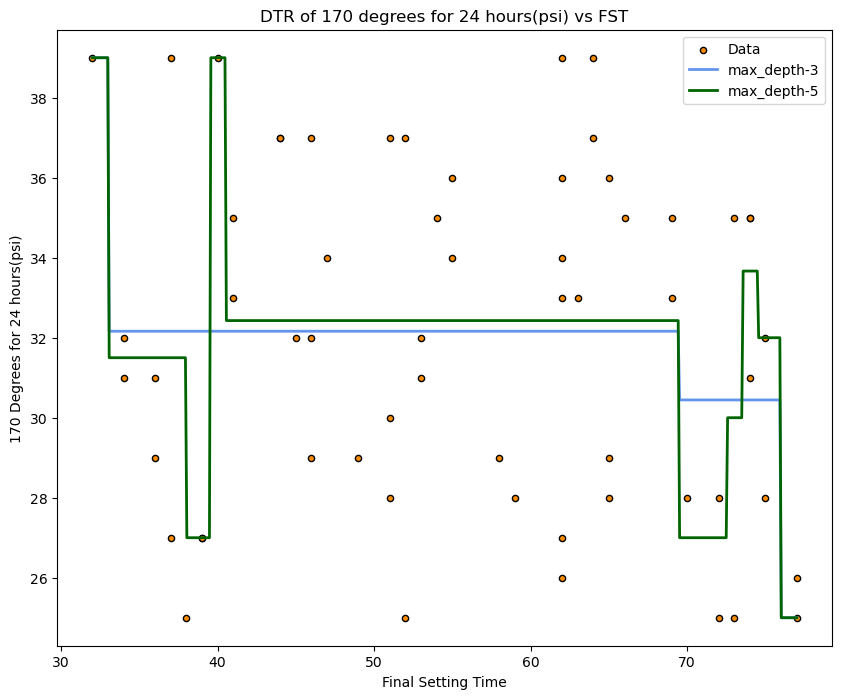

In [42]:
def dtr_170degrees_FST(df):
    """Returns the decision tree regressor of 170 degrees for 24 hours(psi) vs FST."""
    X_FST = df.iloc[:, 7].values.reshape(-1, 1)
    y_170 = df.iloc[:, 11].values
    X_train, X_test, y_train, y_test = train_test_split(X_FST, y_170, test_size=0.2, random_state=42)
    
    regr_0 = DecisionTreeRegressor(max_depth=3, random_state=42)
    regr_0.fit(X_train, y_train)

    regr_1 = DecisionTreeRegressor(max_depth=5, random_state=42)
    regr_1.fit(X_train, y_train)
    
    X_range_FST = np.linspace(X_FST.min(), X_FST.max(), 500).reshape(-1, 1)
    y_0 = regr_0.predict(X_range_FST)
    y_1 = regr_1.predict(X_range_FST)
    
    plt.figure(figsize=(10, 8))

    plt.scatter(X_FST, y_170, s=20, edgecolor="black", c="darkorange", label="Data")

    plt.plot(X_range_FST, y_0, color="cornflowerblue", label="max_depth-3", linewidth=2)
    plt.plot(X_range_FST, y_1, color="darkgreen", label="max_depth-5", linewidth=2)


    plt.xlabel("Final Setting Time")
    plt.ylabel("170 Degrees for 24 hours(psi)")
    plt.title("DTR of 170 degrees for 24 hours(psi) vs FST")
    plt.legend()
    return plt.show()

dtr_170degrees_FST(geopolymer_df)

# Flexural Strength vs IST Plot:

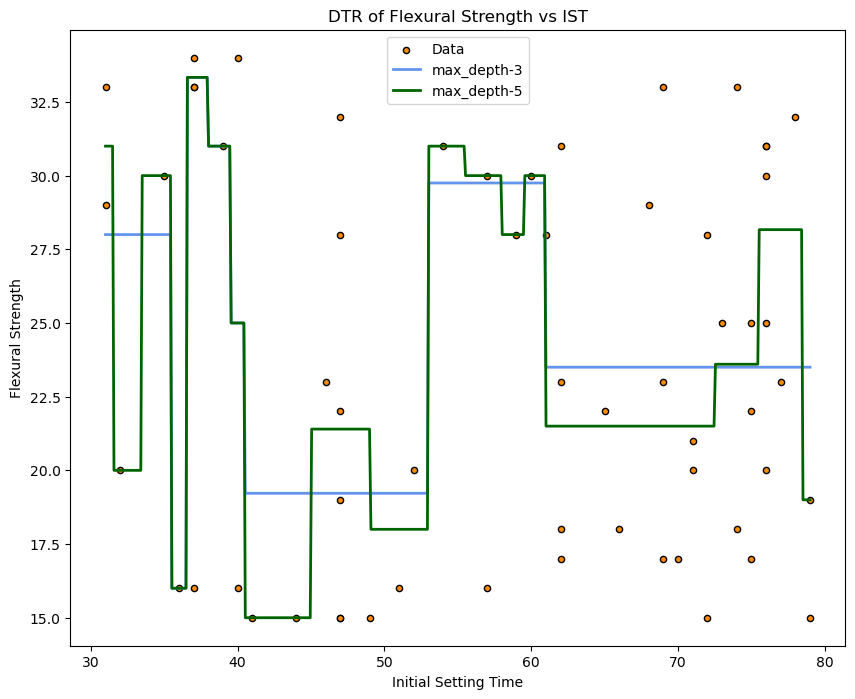

In [43]:
def dtr_FS_IST(df):
    """Returns decision tree regressor for Flexural Strength vs IST."""
    X_IST = df.iloc[:, 6].values.reshape(-1, 1)
    y_FS = df.iloc[:, 12].values
    X_train, X_test, y_train, y_test = train_test_split(X_IST, y_FS, test_size=0.2, random_state=42)
    
    regr_0 = DecisionTreeRegressor(max_depth=3, random_state=42)
    regr_0.fit(X_train, y_train)

    regr_1 = DecisionTreeRegressor(max_depth=5, random_state=42)
    regr_1.fit(X_train, y_train)
    
    X_range = np.linspace(X_IST.min(), X_IST.max(), 500).reshape(-1, 1)
    y_0 = regr_0.predict(X_range)
    y_1 = regr_1.predict(X_range)
    
    plt.figure(figsize=(10, 8))

    plt.scatter(X_IST, y_FS, s=20, edgecolor="black", c="darkorange", label="Data")

    plt.plot(X_range, y_0, color="cornflowerblue", label="max_depth-3", linewidth=2)
    plt.plot(X_range, y_1, color="darkgreen", label="max_depth-5", linewidth=2)


    plt.xlabel("Initial Setting Time")
    plt.ylabel("Flexural Strength")
    plt.title("DTR of Flexural Strength vs IST")
    plt.legend()
    return plt.show()

dtr_FS_IST(geopolymer_df)

# Flexural Strength vs FST Plot:

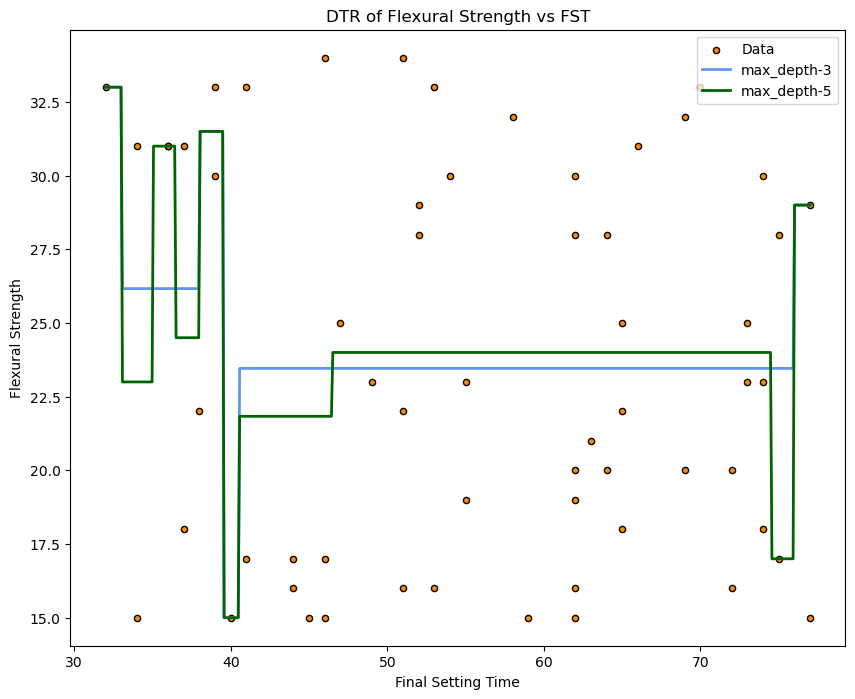

In [47]:
def dtr_FS_FST(df):
    """Returns decision tree regressor of flexural strength vs FST."""
    X_IST = df.iloc[:, 7].values.reshape(-1, 1)
    y_FS = df.iloc[:, 12].values
    X_train, X_test, y_train, y_test = train_test_split(X_IST, y_FS, test_size=0.2, random_state=42)
    
    regr_0 = DecisionTreeRegressor(max_depth=3, random_state=42)
    regr_0.fit(X_train, y_train)

    regr_1 = DecisionTreeRegressor(max_depth=5, random_state=42)
    regr_1.fit(X_train, y_train)
    
    X_range = np.linspace(X_IST.min(), X_IST.max(), 500).reshape(-1, 1)
    y_0 = regr_0.predict(X_range)
    y_1 = regr_1.predict(X_range)
    
    plt.figure(figsize=(10, 8))

    plt.scatter(X_IST, y_FS, s=20, edgecolor="black", c="darkorange", label="Data")

    plt.plot(X_range, y_0, color="cornflowerblue", label="max_depth-3", linewidth=2)
    plt.plot(X_range, y_1, color="darkgreen", label="max_depth-5", linewidth=2)


    plt.xlabel("Final Setting Time")
    plt.ylabel("Flexural Strength")
    plt.title("DTR of Flexural Strength vs FST")
    plt.legend()
    return plt.show()

dtr_FS_FST(geopolymer_df)